In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import datetime
import random
#Import the request library 
import requests

#import the API key 
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime



In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [10]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        print(city_url)
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=busselton
Processing Record 2 of Set 1 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=mandalgovi
Processing Record 3 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=nikolskoye
Processing Record 4 of Set 1 | novyy yarychiv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=novyy+yarychiv
Processing Record 5 of Set 1 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=kiama
Processing Record 6 of Set 1 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=severo-kurilsk


Processing Record 4 of Set 2 | fort saint john
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=fort+saint+john
City not found. Skipping...
Processing Record 5 of Set 2 | warri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=warri
Processing Record 6 of Set 2 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=saint-philippe
Processing Record 7 of Set 2 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=comodoro+rivadavia
Processing Record 8 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=ushuaia
Processing Record 9 of Set 2 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=port+blair
Processing Record 

Processing Record 6 of Set 3 | murgab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=murgab
Processing Record 7 of Set 3 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=cayenne
Processing Record 8 of Set 3 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=qasigiannguit
Processing Record 9 of Set 3 | hirado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=hirado
Processing Record 10 of Set 3 | louisbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=louisbourg
City not found. Skipping...
Processing Record 11 of Set 3 | mapimi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=mapimi
Processing Record 12 of Set 3 | grand river south east
htt

Processing Record 9 of Set 4 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=tasiilaq
Processing Record 10 of Set 4 | buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=buchanan
Processing Record 11 of Set 4 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=aklavik
Processing Record 12 of Set 4 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=meulaboh
Processing Record 13 of Set 4 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=thinadhoo
Processing Record 14 of Set 4 | numan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=numan
Processing Record 15 of Set 4 | dickinson
http://api.openweathermap.org/data/2.5/weather?

Processing Record 12 of Set 5 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=port+hedland
Processing Record 13 of Set 5 | bintulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=bintulu
Processing Record 14 of Set 5 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=faya
Processing Record 15 of Set 5 | kayerkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=kayerkan
Processing Record 16 of Set 5 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=nishihara
Processing Record 17 of Set 5 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=port+elizabeth
Processing Record 18 of Set 5 | nurpur
http://api.openweathermap.org/d

Processing Record 16 of Set 6 | baiyin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=baiyin
Processing Record 17 of Set 6 | kichera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=kichera
Processing Record 18 of Set 6 | katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=katangli
Processing Record 19 of Set 6 | madang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=madang
Processing Record 20 of Set 6 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=sola
Processing Record 21 of Set 6 | katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=katherine
Processing Record 22 of Set 6 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 20 of Set 7 | baijiantan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=baijiantan
Processing Record 21 of Set 7 | malinovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=malinovskiy
Processing Record 22 of Set 7 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=isangel
Processing Record 23 of Set 7 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=fairbanks
Processing Record 24 of Set 7 | gotsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=gotsu
Processing Record 25 of Set 7 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=salalah
Processing Record 26 of Set 7 | gillette
http://api.openweathermap.org/data/2.5/

Processing Record 23 of Set 8 | bima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=bima
Processing Record 24 of Set 8 | umba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=umba
Processing Record 25 of Set 8 | trieste
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=trieste
Processing Record 26 of Set 8 | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=manokwari
Processing Record 27 of Set 8 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=vestmanna
Processing Record 28 of Set 8 | chiredzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=chiredzi
Processing Record 29 of Set 8 | yamada
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 25 of Set 9 | missoula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=missoula
Processing Record 26 of Set 9 | purpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=purpe
Processing Record 27 of Set 9 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=lorengau
Processing Record 28 of Set 9 | ginir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=ginir
Processing Record 29 of Set 9 | balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=balkanabat
Processing Record 30 of Set 9 | solovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=solovetskiy
City not found. Skipping...
Processing Record 31 of Set 9 | mezen
http://api.openwea

Processing Record 29 of Set 10 | bhag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=bhag
Processing Record 30 of Set 10 | marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=marystown
Processing Record 31 of Set 10 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=alice+springs
Processing Record 32 of Set 10 | koumac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=koumac
Processing Record 33 of Set 10 | neiafu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=neiafu
Processing Record 34 of Set 10 | ban nahin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=ban+nahin
Processing Record 35 of Set 10 | sawtell
http://api.openweathermap.org/data/2.

Processing Record 32 of Set 11 | mpika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=mpika
Processing Record 33 of Set 11 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=shimoda
Processing Record 34 of Set 11 | pryozerne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=pryozerne
Processing Record 35 of Set 11 | churhat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=churhat
Processing Record 36 of Set 11 | beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=beira
Processing Record 37 of Set 11 | basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=basco
Processing Record 38 of Set 11 | santa isabel
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 35 of Set 12 | zalesovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=zalesovo
Processing Record 36 of Set 12 | jaunjelgava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=jaunjelgava
Processing Record 37 of Set 12 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=tumannyy
City not found. Skipping...
Processing Record 38 of Set 12 | sindand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=sindand
City not found. Skipping...
Processing Record 39 of Set 12 | sheregesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=sheregesh
Processing Record 40 of Set 12 | manica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d92620dc4d497a7f35833a3bb191d662&q=manica
Processing Record 

In [31]:
len(city_data_df)

556

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
546,Ust-Nera,64.5667,143.2000,5.34,97,100,5.39,RU,2021-11-03 21:02:39
547,Oxbow,49.2333,-102.1676,48.63,47,0,6.08,CA,2021-11-03 21:02:39
548,Zhigansk,66.7697,123.3711,-8.84,97,100,9.64,RU,2021-11-03 20:58:57
549,Potsdam,52.3989,13.0657,49.05,91,100,3.00,DE,2021-11-03 21:02:39
550,Hvide Sande,56.0045,8.1294,43.09,86,13,8.48,DK,2021-11-03 21:02:39
551,Kusti,13.1629,32.6635,85.28,43,31,2.53,SD,2021-11-03 21:02:40
552,Tonj,7.2737,28.6822,73.45,86,100,0.98,SS,2021-11-03 21:02:40
553,Sambava,-14.2667,50.1667,73.83,88,3,3.58,MG,2021-11-03 21:02:40
554,Vradiyivka,47.8620,30.5919,49.53,72,26,2.89,UA,2021-11-03 21:02:40
555,Nalut,30.3333,10.8500,74.43,22,4,12.80,LY,2021-11-03 21:02:41


In [39]:
new_column_order = ["City","Country","Date","Lat","Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-11-03 20:57:54,3.0707,172.7902,83.17,71,100,15.73
1,Saint-Philippe,RE,2021-11-03 20:58:09,-21.3585,55.7679,71.19,80,4,6.64
2,Kupang,ID,2021-11-03 21:01:00,-10.1667,123.5833,79.63,85,91,8.10
3,Atuona,PF,2021-11-03 20:57:42,-9.8000,-139.0333,78.03,66,61,12.44
4,Mataura,NZ,2021-11-03 20:57:32,-46.1927,168.8643,56.48,49,30,2.33
...,...,...,...,...,...,...,...,...,...
551,Kusti,SD,2021-11-03 21:02:40,13.1629,32.6635,85.28,43,31,2.53
552,Tonj,SS,2021-11-03 21:02:40,7.2737,28.6822,73.45,86,100,0.98
553,Sambava,MG,2021-11-03 21:02:40,-14.2667,50.1667,73.83,88,3,3.58
554,Vradiyivka,UA,2021-11-03 21:02:40,47.8620,30.5919,49.53,72,26,2.89


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

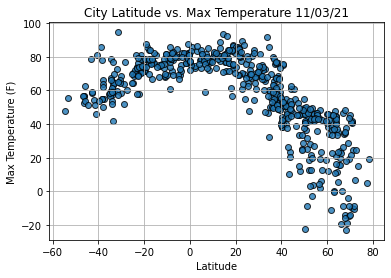

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

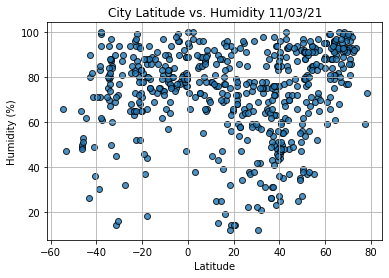

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

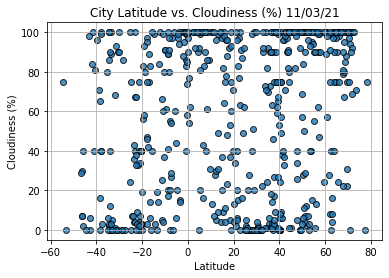

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

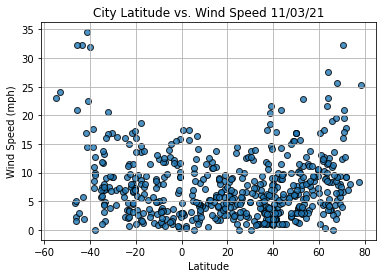

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13] 
index13

City                     Berlevag
Country                        NO
Date          2021-11-03 21:01:02
Lat                       70.8578
Lng                       29.0864
Max Temp                    40.95
Humidity                       81
Cloudiness                      0
Wind Speed                  19.57
Name: 13, dtype: object

In [49]:
#Latitudes Greater than 0
city_data_df["Lat"] >=0

0       True
1      False
2      False
3      False
4      False
       ...  
551     True
552     True
553    False
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [51]:
#For latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-11-03 20:57:54,3.0707,172.7902,83.17,71,100,15.73
5,Belyy Yar,RU,2021-11-03 20:59:35,53.6039,91.3903,3.85,71,40,4.47
6,Yellowknife,CA,2021-11-03 20:53:01,62.4560,-114.3525,41.41,88,40,10.36
7,Severo-Kurilsk,RU,2021-11-03 20:59:43,50.6789,156.1250,36.63,79,50,3.51
9,Tasiilaq,GL,2021-11-03 20:57:39,65.6145,-37.6368,19.63,82,24,8.30


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

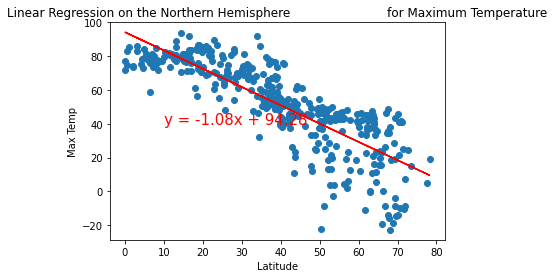

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

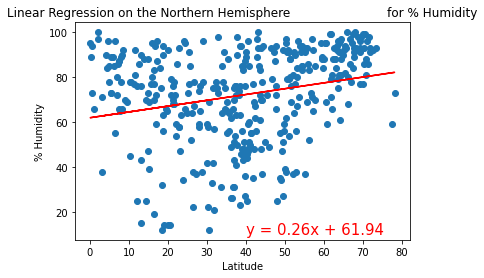

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

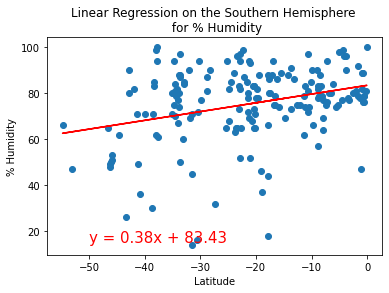

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

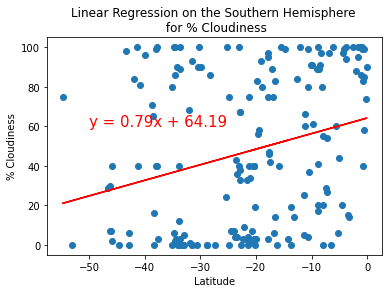

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

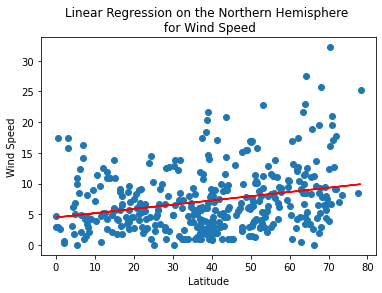

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

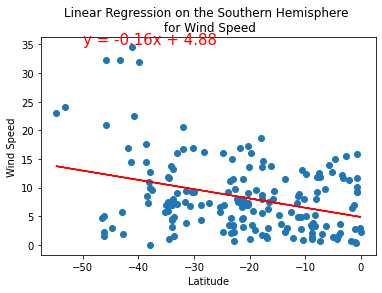

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
